In [29]:
import glove

cooccur = {
    1: {
		2: 0.5
	},
    
	0: {
		2: 3.5,
		0: 3.5
	},
    
	2: {
		0: 3.5,
		1: 100,
		2: 1.2
	}
    
}

model1 = glove.Glove(cooccur, d=50, alpha=0.75, x_max=100.0)

for epoch in range(25):
    err = model1.train(step_size=0.1, workers=9, batch_size=50)
    print("epoch %d \t error %.3f" % (epoch, err), flush=True)

epoch 0 	 error 1.793
epoch 1 	 error 1.148
epoch 2 	 error 0.774
epoch 3 	 error 0.536
epoch 4 	 error 0.379
epoch 5 	 error 0.273
epoch 6 	 error 0.201
epoch 7 	 error 0.150
epoch 8 	 error 0.115
epoch 9 	 error 0.090
epoch 10 	 error 0.073
epoch 11 	 error 0.061
epoch 12 	 error 0.052
epoch 13 	 error 0.046
epoch 14 	 error 0.041
epoch 15 	 error 0.038
epoch 16 	 error 0.036
epoch 17 	 error 0.034
epoch 18 	 error 0.032
epoch 19 	 error 0.031
epoch 20 	 error 0.030
epoch 21 	 error 0.030
epoch 22 	 error 0.029
epoch 23 	 error 0.028
epoch 24 	 error 0.028


In [30]:
A = model1.W

In [31]:
A[0]

array([ -6.30877514e-03,   3.51930776e-03,  -2.53997806e-03,
         1.83588989e-03,   6.28033723e-03,  -2.80100832e-03,
        -3.77363588e-03,   9.08503631e-03,   1.13705387e-02,
         7.93241224e-03,  -2.79679788e-03,   1.63305973e-03,
         4.53529938e-03,   6.44048736e-03,   1.00551834e-04,
         4.00516672e-03,   1.32354659e-03,  -9.92788377e-03,
         8.24865744e-03,   9.63886657e-03,  -3.28906638e-03,
         2.06401395e-03,  -1.08738295e-02,  -3.83867765e-03,
         8.69104497e-03,   5.80285596e-03,  -3.51205063e-04,
         8.12948852e-03,  -3.54501122e-03,   2.51760832e-03,
         7.00561464e-03,  -3.05066320e-03,   7.07681374e-03,
        -8.25260189e-03,   4.87491429e-03,   3.22870880e-03,
        -5.30817550e-03,   1.06317363e-02,   1.11221722e-04,
         6.96634196e-03,  -8.32006873e-03,  -7.10864597e-03,
        -9.14896751e-03,   6.38025655e-03,   2.14668498e-03,
        -5.94920112e-05,  -8.35089751e-03,   1.36054008e-03,
        -1.22539056e-03,

In [19]:
import pickle
import h5py

In [20]:
with open('/Users/lizhn7/Downloads/EXPERIMENT/COPA/CausalNet/index.pkl', 'rb') as fp:
    word2index, index2word = pickle.load(fp)

with h5py.File('/Users/lizhn7/Downloads/EXPERIMENT/COPA/CausalNet/glove_embedding.h5', 'r') as fh:
    glove_embedding = fh['glove_embedding'][:]

In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [25]:
viz_words = 500
tsne = TSNE()
embed_tsne = tsne.fit_transform(glove_embedding[:viz_words, :])

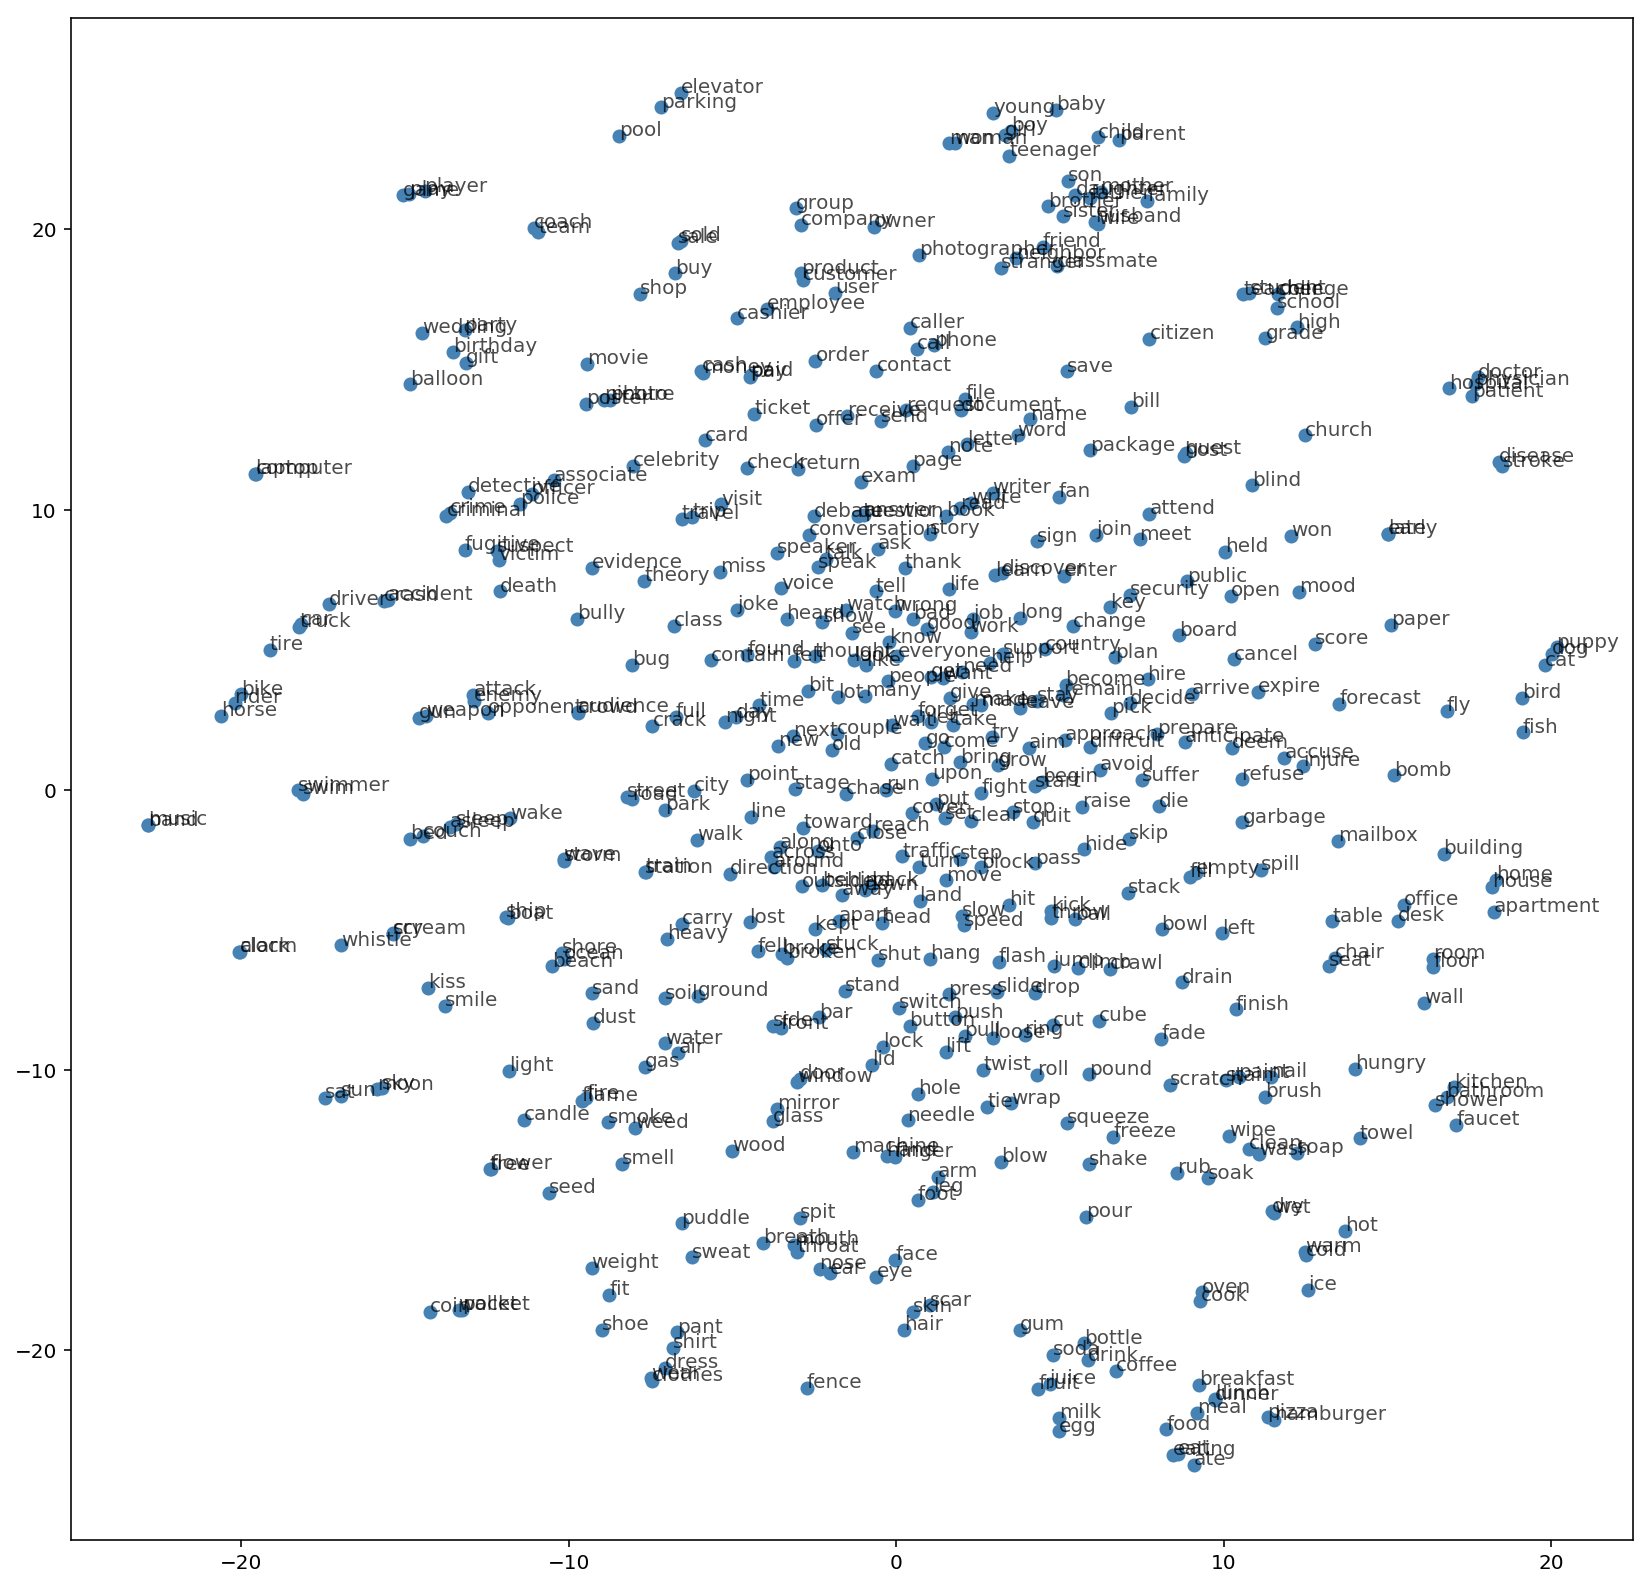

In [26]:
fig, ax = plt.subplots(figsize=(14, 14))
for idx in range(1, viz_words):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(index2word[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)